In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img1 = cv2.imread('images/book.png',0) # queryImage
img2 = cv2.imread('images/books.jpg',0) # trainImage

In [ ]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

In [ ]:
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

In [ ]:
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

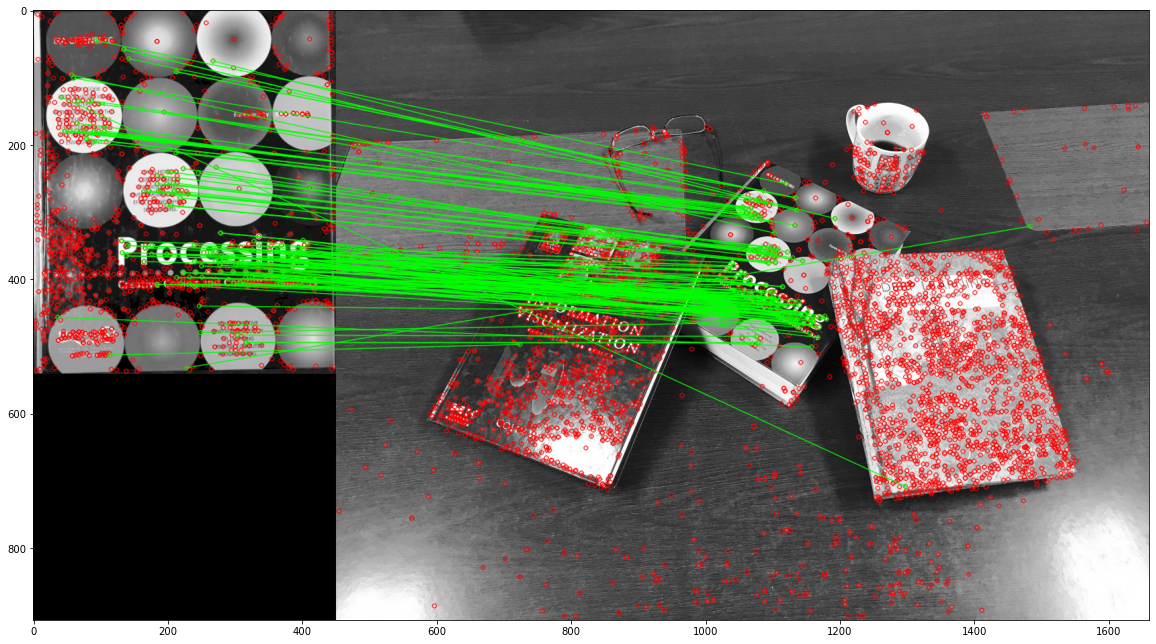

(<matplotlib.image.AxesImage at 0x217369105b0>, None)

In [11]:
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.figure(figsize=(20,20))
plt.imshow(img3,),plt.show()